In [1]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [2]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

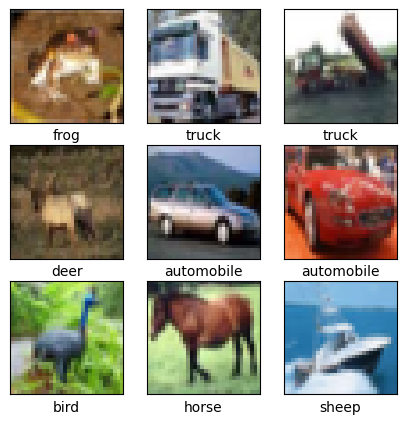

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse',
               'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [4]:
# 평균과 표준 편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [6]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 37s 15ms/step - loss: 1.6098 - acc: 0.4182 - val_loss: 1.3638 - val_acc: 0.5070
Epoch 2/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.2742 - acc: 0.5449 - val_loss: 1.1816 - val_acc: 0.5757
Epoch 3/30
1094/1094 [==============================] - 16s 15ms/step - loss: 1.0979 - acc: 0.6135 - val_loss: 1.0942 - val_acc: 0.6101
Epoch 4/30
1094/1094 [==============================] - 17s 15ms/step - loss: 0.9567 - acc: 0.6638 - val_loss: 0.9589 - val_acc: 0.6606
Epoch 5/30
1094/1094 [==============================] - 16s 14ms/step - loss: 0.8487 - acc: 0.7036 - val_loss: 0.8836 - val_acc: 0.6913
Epoch 6/30
1094/1094 [==============================] - 18s 16ms/step - loss: 0.7575 - acc: 0.7386 - val_loss: 0.8398 - val_acc: 0.7029
Epoch 7/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.6835 - acc: 0.7629 - val_loss: 0.8743 - val_acc: 0.6995
Epoch 8/30
1094/1094 [==========================

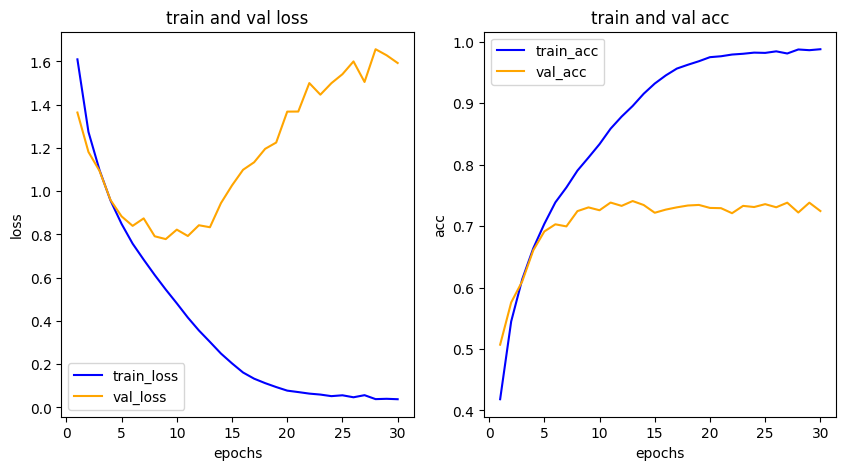

In [7]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

1/1 [==============================] - 0s 140ms/step


<ipython-input-9-026447203876>:24: RuntimeWarning: invalid value encountered in divide
  x -= x.mean(); x /= x.std()


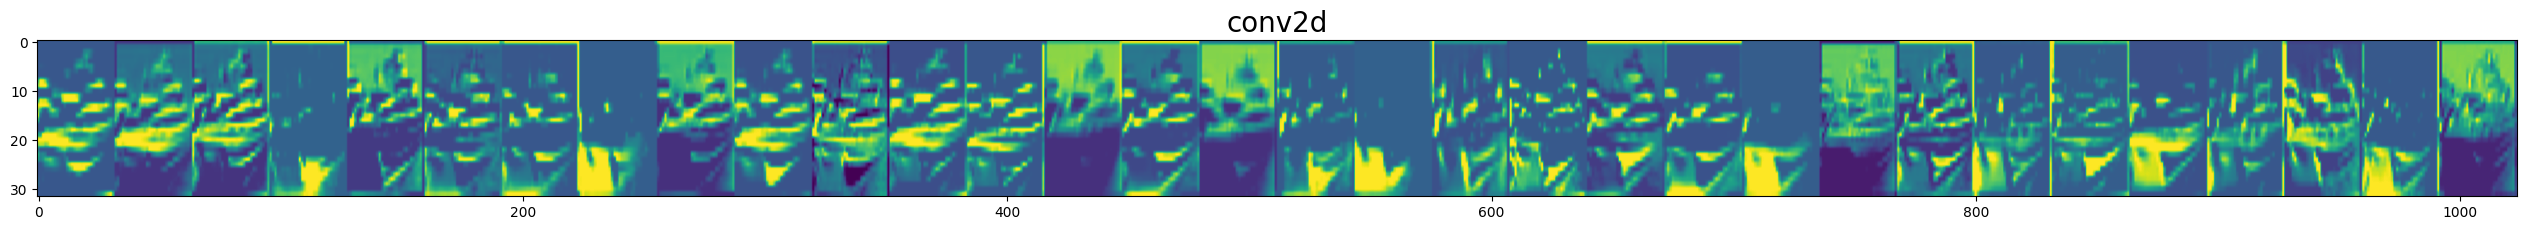

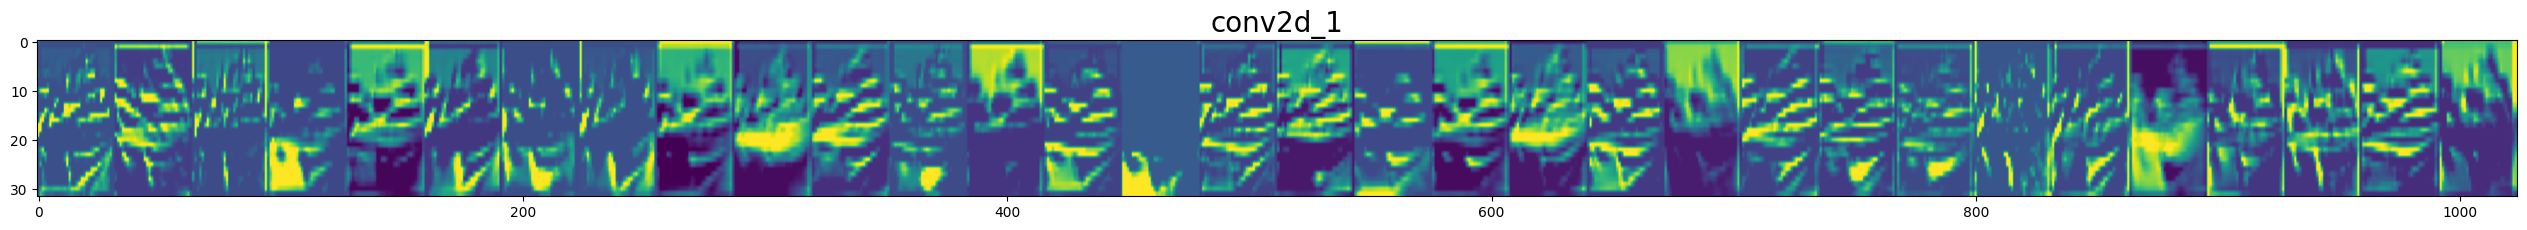

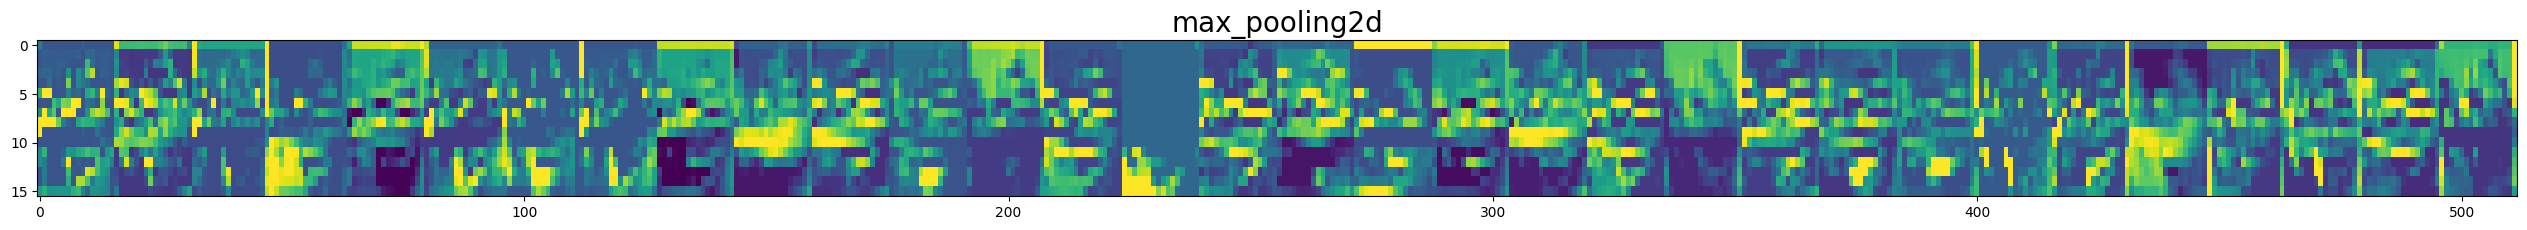

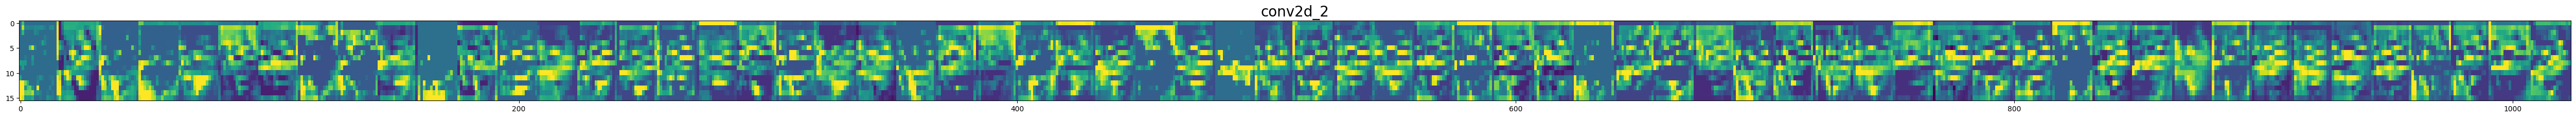

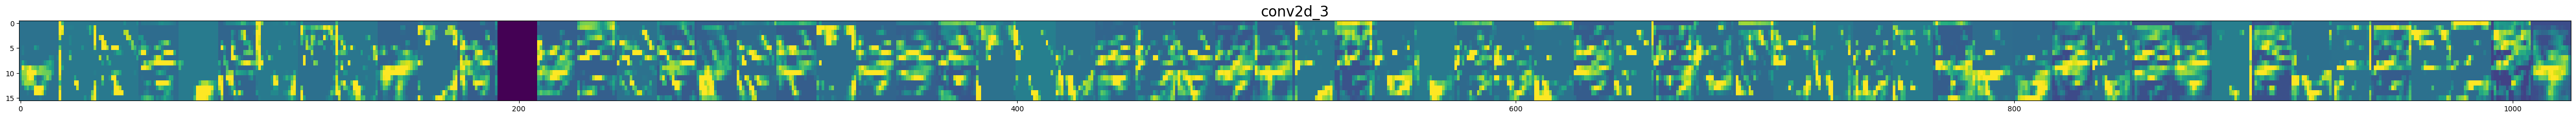

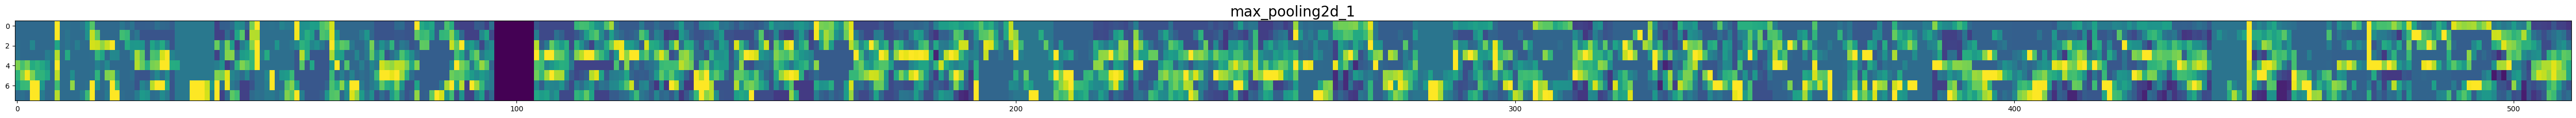

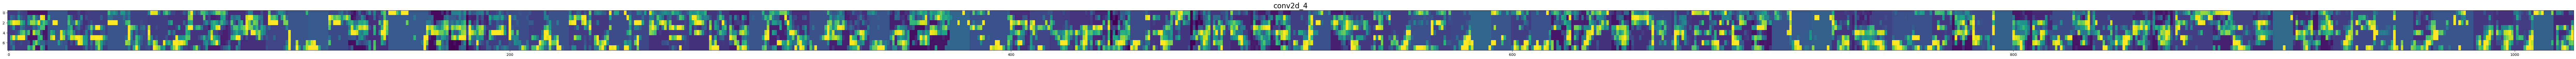

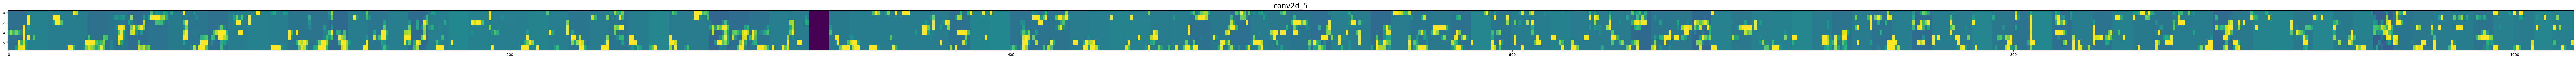

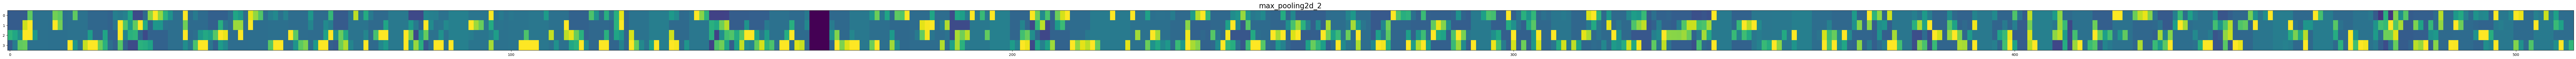

In [9]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
  # Dense층은 제외합니다.
  if(len(feature_map.shape) == 4):
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]

    display_grid = np.zeros((img_size, img_size * features))

    # 각 특징맵을 display_grid 배열에 이어붙입니다.
    for i in range(features):
      x = feature_map[0, :, :, i]
      x -= x.mean(); x /= x.std()
      x *= 64; x+= 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * img_size : (i + 1) * img_size] = x

    plt.figure(figsize = (features, 2 + 1. / features))
    plt.title(layer_name, fontsize = 20)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')